<a href="https://colab.research.google.com/github/GrzegorzSzczepanek/notes-from-papers/blob/main/issues_and_possible_solutions_for_MI_BCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Systemy BCI oparte na Motion Imagery (MI) i wyzwania z nimi związane

W poniższym dokumencie postaram się przedstawić kilka ważnych elementów do stworzenia MI-BCI tj:
- zebranie danych
- Trening
- przetworzenie
- feature extraction
- chanel and feature selection
- klasyfikacja


## Kategorie systemów EEG-BCI:
- Synchroniczne:
> W synchronicznym systemie BCI aktywność mózgu jest generowana przez użytkownika w oparciu o pewien sygnał/znak lub zdarzenie mające miejsce w systemie w określonym czasie. Te sygnały/znaki mają pomóc w odróżnieniu intencionalnej aktywności neuronowej od nieintencjonalnej

- Asynchroniczne:
> Systemy EEG-BCI tego typu działają niezależnie od znaków/sygnałów, ale mimo tego musi rozpoznawać aktywność intencjonalną od nieintencjonalnej

Wyobrażenie ruchu tworzy aktywność mózgu podobną do rzeczywistego ruchu, co zmniejsza procent mocy w stosunku do referencyjnej linii bazowej zarówno w częstotliwościach mu, jak i beta w korze czuciowo-ruchowej; jest to znane jako event related desynchronisation (ERD).
Natychmiast po wykonaniu przez użytkownika zadania związanego z wyobraźnią, aktywność mózgu użytkownika może doświadczyć event related synchronisation (ERS), która jest wzrostem procentu mocy w stosunku do referencyjnej linii bazowej.

Ponieważ ERD/ERS mieszają się z inną aktywnością mózgu stworzoną nieumyślnie przez użytkownika, taką jak mimowolne ruchy mięśni i mrugnięcia oczu, stosunek sygnału do szumu (SNR) jest niski. Algorytm zaprojektowany dla MI-BCI musi być w stanie odróżnić aktywność MI dla sygnału sterującego od innej mimowolnej aktywności.

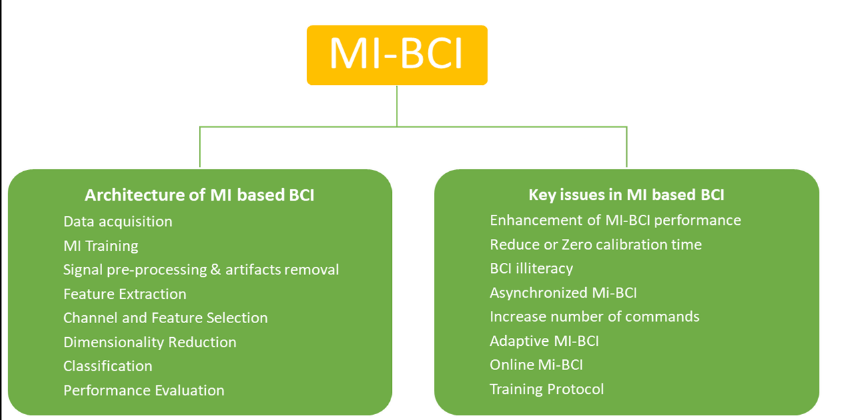

## Pobór danych

Sygnały EEG są zwykle pozyskiwane w trybie jednobiegunowym i dwubiegunowym. W trybie jednobiegunowym rejestrowana jest różnica potencjałów między wszystkimi elektrodami w odniesieniu do jednego odniesienia. Każda para elektroda-odniesienie tworzy jeden kanał EEG. Natomiast w trybie bipolarnym rejestrowana jest różnica potencjałów między dwiema określonymi elektrodami, a każda para tworzy kanał EEG. Aby ustandaryzować pozycje i nazewnictwo, elektrody są umieszczane na skórze głowy zgodnie z międzynarodowym standardem 10-20. Pomaga to w niezawodnym gromadzeniu danych i spójności między różnymi sesjami BCI.

## Poniższy obrazek przedstawia typową strukturę MI-BCI

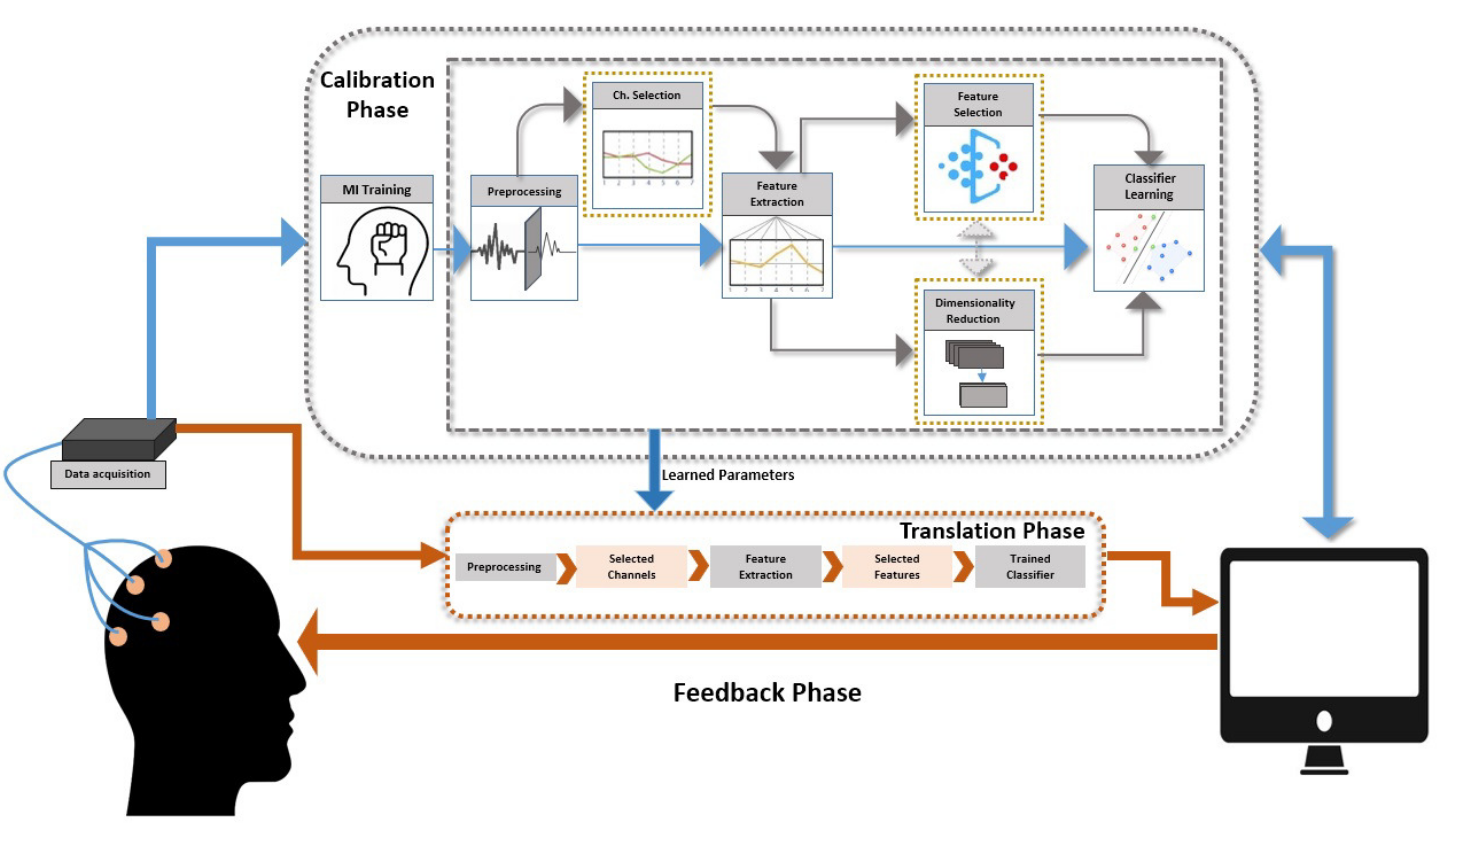

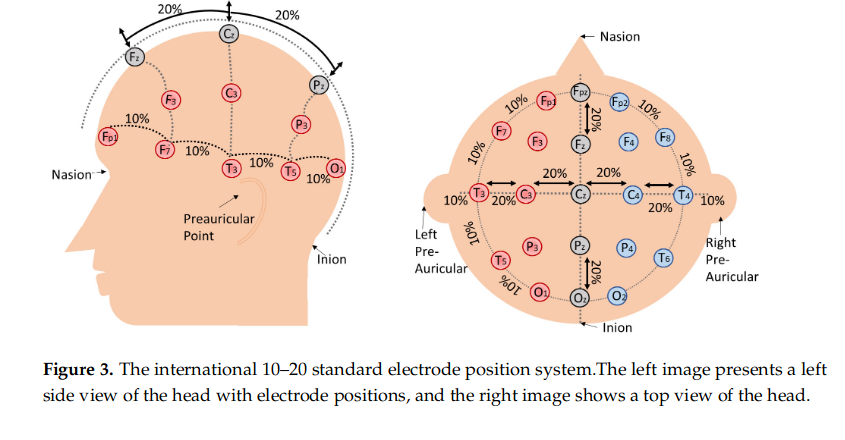

## Trening MI

Podobnie jak w przypadku każdej innej umiejętności, trening MI pomaga w uzyskaniu zdolności do wytwarzania wyraźnego i stabilnego wzorca EEG podczas wykonywania różnych zadań MI. Paradygmat treningowy Graza jest standardowym podejściem treningowym do motor imagery . Podejście Graza opiera się na uczeniu maszynowym, w którym system dostosowuje się do wzorca EEG użytkownika. Podczas tego paradygmatu szkoleniowego użytkownik jest instruowany poprzez wskazówkę/podpowiedź do wykonania zadania motor imagery, takiego jak wyobraźnia lewej i prawej ręki. Sygnały EEG, które są zbierane podczas różnych zadań wyobraźni, są wykorzystywane do szkolenia systemu w zakresie rozróżniania zadań MI na podstawie wzorca EEG. Po przeszkoleniu systemu użytkownicy są instruowani, aby wykonywać zadania MI, ale tym razem użytkownik otrzymuje informacje zwrotne. Proces ten jest powtarzany wielokrotnie w różnych sesjach. Każda sesja ma kolejne wielokrotne przebiegi protokołu szkoleniowego Graz.


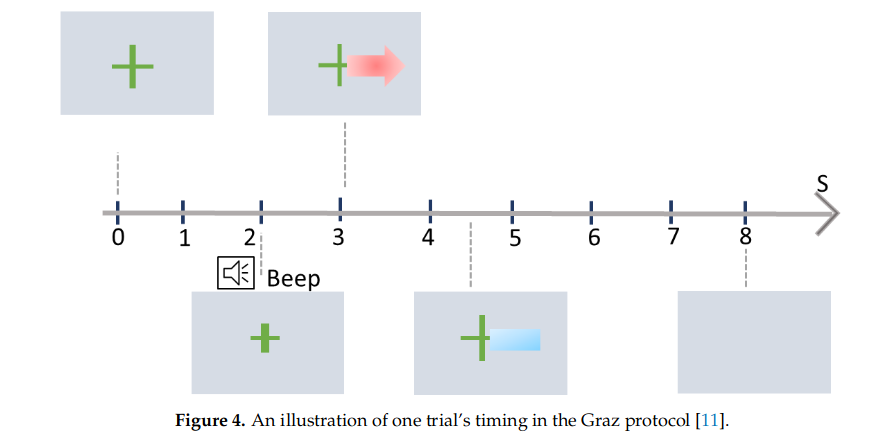

Czas trwania próby różni się w zależności od scenariusza. Zazwyczaj jedna próba protokołu treningowego graza trwa osiem sekund, jak pokazano na rysunku 4. Na początku każdej ścieżki MI, czyli t = 0s, wyświetlany jest krzyżyk fiksacji, aby poinstruować użytkownika, że próba się rozpoczęła. Po dwusekundowej przerwie (t = 2s), sygnał dźwiękowy jest używany do przygotowania użytkownika do nadchodzącego zadania MI. Ta 2-sekundowa przerwa działa jako okres odniesienia, aby zobaczyć wzorzec zadania MI w sygnale EEG w nadchodzącym zadaniu MI w t = 3s. Po trzech sekundach na ekranie pojawia się strzałka wskazująca zadanie MI. Na przykład strzałka w prawym kierunku oznacza obraz motoryczny prawej ręki. W początkowej fazie treningu nie są przekazywane żadne informacje zwrotne. Po skalibrowaniu systemu informacje zwrotne są przekazywane przez cztery sekundy. Kierunek paska informacji zwrotnej wskazuje rozpoznanie wzorca MI przez system, a długość paska reprezentuje pewność systemu w rozpoznawaniu wzorca klasy MI.

## Przetwarzanie sygnałów i usuwanie artifactów
artifact - niechciana aktywność podczas pobierania sygnału. Dzielą się one na dwie kategorie:
- endogeniczne:
> Artefakty endogenne są generowane z ludzkiego ciała z wyłączeniem mózgu, a artefakty pozafizjologiczne są generowane ze źródeł zewnętrznych (tj. źródeł spoza ludzkiego ciała).

- egzogeniczne:


Rolą przetwarzania sygnałów jest pozbycie się takich egzogenicznych i endogenicznych artifactów z sygnałów EEG.

Systemy MI-BCI opierają się gównie na czasowym (temporal), lub przestrzennym (spatial) filtrowaniu

## Filtrowanie czasowe jest najczęściej stosowaną metodą przetwarzania.
Jego rolą jest filtrowanie pasm częstotliwości by wyłączyć te pasma, które odnoszą się do danego kognitywnego taska.W przypadku MI oznacza to zwykle filtr pasmowoprzepustowy Butterwortha lub Chebysheva o częstotliwości 8-30 Hz.

## Filtrowanie przestrzenne
Podobnie jak filtry czasowe, filtry przestrzenne wyodrębniają niezbędne informacje przestrzenne związane z zadaniem motorycznym osadzonym w sygnałach EEG. Wspólna średnia referencyjna (CAR) jest filtrem przestrzennym, który usuwa wspólne komponenty ze wszystkich kanałów, pozostawiając kanały tylko z sygnałami specyficznymi dla kanału. Odbywa się to poprzez usunięcie średniej wszystkich k kanałów z każdego kanału xi:
>

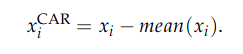

CAR jest podejściem tanim obliczeniowo. Istnieje także nowsza wersja CAR'a, którą jest Laplacian spatial filter, którego zadaniem jest usunięcie wspólnych komponentów sąsiadujących sygnałów, co zwiększa różnicę pomiędzy kanałami.
>
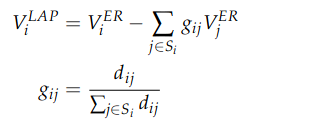

gdzie VLAP i to i-ty kanał filtrowany metodą Laplaciana, VER i to różnica potencjałów między i-tą elektrodą a elektrodą odniesienia, Si to zbiór elektrod sąsiadujących z i-tą elektrodą, a dij to odległość euklidesowa między i-tą i j-tą elektrodą.


## Feature Extraction
Dla uzyskania jak najlepszego efektu musimy pracować z małymi wartościami, które są w stanie pomóc nam rozróżnić aktywność z tasków MI od nieintencjonalnej aktywności neuronalnej.

Formalnie feature extraction polega na mapowaniu przetworzonych danych EEG do feature space (idk jak przetłumaczyć)

W przypadku MI-BCI metody ekstrakcji cech można podzielić na sześć kategorii: (a) metody w dziedzinie czasu, które wykorzystują informacje czasowe osadzone w sygnale EEG; (b) metody spektralne wyodrębniają informacje osadzone w dziedzinie częstotliwości sygnałów EEG; (c) metody czasowo-częstotliwościowe działają razem na informacjach w dziedzinie czasu i częstotliwości; (d) metody przestrzenne wyodrębniają informacje przestrzenne z sygnałów EEG pochodzących z wielu elektrod; (e) metody przestrzenno-czasowe działają razem z informacjami przestrzennymi i czasowymi w celu wyodrębnienia cech; (f) metody przestrzenno-spektralne wykorzystują informacje przestrzenne i spektralne wielowymiarowych sygnałów EEG do ekstrakcji cech; oraz (e) metody Riemannian Manifold, które są zasadniczo podkategorią metod przestrzenno-czasowych, które wykorzystują różnorodne właściwości danych EEG do ekstrakcji cech.

W przypadku MI-BCI metody ekstrakcji cech można podzielić na sześć kategorii:

- metody w dziedzinie czasu, które wykorzystują informacje czasowe osadzone w sygnale EEG;

- metody spektralne wyodrębniają informacje osadzone w dziedzinie częstotliwości sygnałów EEG;

- metody czasowo-częstotliwościowe działają razem na informacjach w dziedzinie czasu i częstotliwości;

- metody przestrzenne wyodrębniają informacje przestrzenne z sygnałów EEG pochodzących z wielu elektrod;

- metody przestrzenno-czasowe działają razem z informacjami przestrzennymi i czasowymi w celu wyodrębnienia cech;

- metody przestrzenno-spektralne wykorzystują informacje przestrzenne i spektralne wielowymiarowych sygnałów EEG do ekstrakcji cech;

- metody Riemannian Manifold, które są zasadniczo podkategorią metod przestrzenno-czasowych, które wykorzystują różnorodne właściwości danych EEG do ekstrakcji cech.

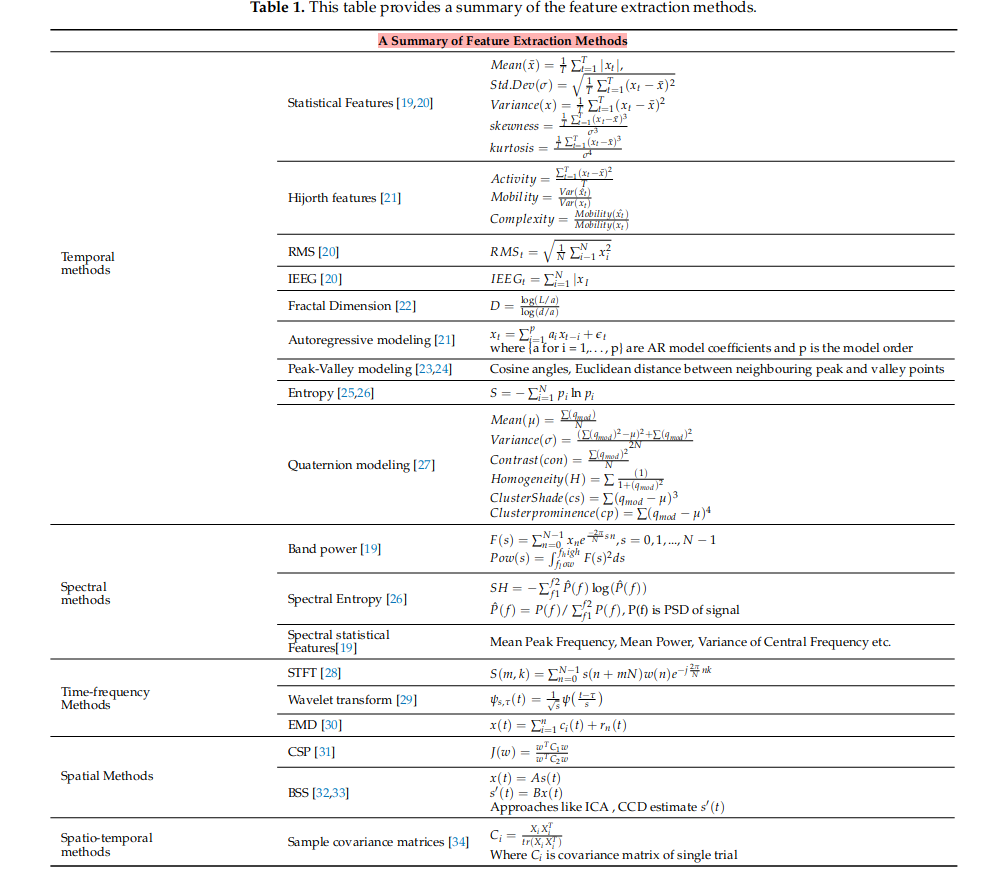

### Metody w dziedzinie czasu
Metody w dziedzinie czasu badają, jak modulacja SMR zmienia się w funkcji czasu. Działają one na pojedynczych kanałach i wyciągają z danych informacje czasową powiązaną z taskiem.

Jednym ze sposobów wyodrębniania informacji czasowych jest reprezentacja sygnału w postaci szczytów (lokalne maksimum) i dolin (lokalne minimum). W tej reprezentacji szczytu i doliny różne punkty cech są wyodrębniane między sąsiednimi punktami szczytu i doliny. Yilmaz i wsp. aproksymowali sygnał EEG w wektorze 2D, który zawiera cosinus kąta między punktami przejściowymi (szczyt lub dolina) i znormalizował stosunek odległości euklidesowej w lewym wektorze.

### Metody spektralne
Metody spektralne wyodrębniają informacje z sygnałów EEG w dziedzinie częstotliwości. Podobnie jak w przypadku metody czasowej, metody statystyczne są również stosowane w dziedzinie częstotliwości. Samuel i wsp. wykorzystali metody statystyczne zarówno w dziedzinie czasu, jak i częstotliwości do dekodowania obrazów motorycznych. Najczęściej stosowaną metodą spektralną jest moc (energia) sygnałów EEG w określonym paśmie częstotliwości. Zazwyczaj moc widmowa jest obliczana w pasmach częstotliwości mu (μ), beta (β), theta (θ) i delta (δ). Odbywa się to poprzez dekompozycję sygnału EEG na jego składowe częstotliwościowe w wybranym paśmie częstotliwości przy użyciu szybkiej transformaty Fouriera (FFT). Inną metodą opartą na domenie częstotliwości jest gęstość widmowa mocy (PSD). PSD jest miarą rozkładu mocy sygnału na częstotliwości. Istnieje wiele metod jego szacowania, takich jak uśredniony zmodyfikowany periodogram Welcha, równanie Yule-Walkera lub periodogram Lomb-Scargle'a. Entropia widmowa

### metody domeny przestrznnej
W przeciwieństwie do metod czasowych, które działają tylko z jednym kanałem naraz, metody domeny przestrzennej działają z wieloma kanałami. Metody przestrzenne próbują wyodrębnić cechy poprzez znalezienie kombinacji kanałów. Można to osiągnąć stosując ślepą separację źródeł (BSS). BSS zakłada, że każdy pojedynczy kanał jest sumą czystych sygnałów EEG i kilku artefaktów.

### Metody przestrzenno-czasowe i przestrzenno-spektralne
Metody przestrzenno-czasowe to algorytmy, które manipulują zarówno czasem, jak i przestrzenią (kanałami). Głównymi metodami przestrzenno-czasowymi stosowanymi w dotychczasowych badaniach MI-BCI są metody oparte na Riemannian Manifold. Inne metody przestrzenno-czasowe są zwykle oparte na głębokim uczeniu.
>

Jedno z takich podejść wykorzystuje algorytm BSS do rozdzielenia sygnału wejściowego x(t) z pojedynczego kanału na równą liczbę szacowanych sygnałów źródłowych
s(t). Te sygnały źródłowe są posortowane na podstawie korelacj pomiędzy ich spektralnymi komponentami.


Wreszcie, ciągłe wavelet transform jest stosowane na posortowanych sygnałach źródłowych w celu uzyskania obrazów widma t-f, które są następnie przekazane CNN-owi w celu klasyfikacji. Strukturę dekodowania EEG w podobnym duchu, która wyodrębnia cechy przestrzenne i czasowe z surowych sygnałów EEG. Połączenie sieci z long short-term memory network (LSTM) i CNN, która jednocześnie uczy się korelacji czasowych i spektralnych z surowego sygnału EEG. Ponadto można wykorzystać tu dekompozycję discrete wavelet transformation do wyodrębnienia informacji w domenie spektralnej w celu klasyfikacji zadania MI.

# Riemannian Geometry Based Methods (daje ss bo nw jak przepisac te znkai)

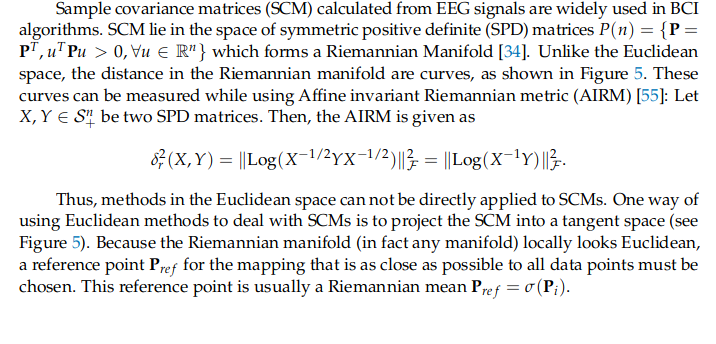

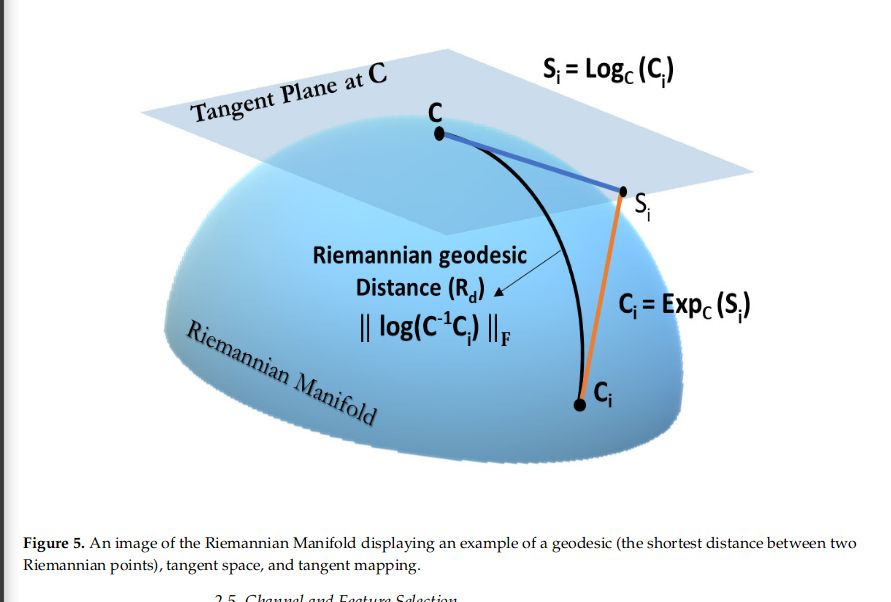


# Chanel and Feature selection

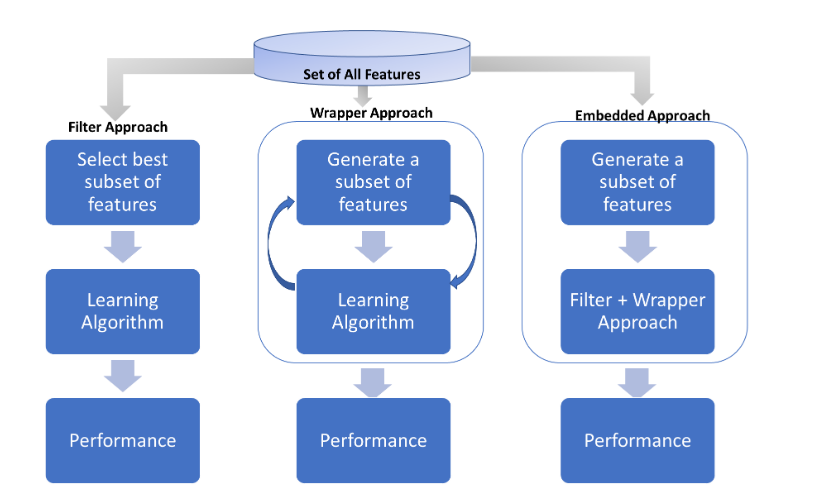

Dane EEG są zwykle rejestrowane w wielu miejscach na skórze głowy. Zapewnia to wyższą rozdzielczość przestrzenną i korzyści w identyfikacji optymalnych lokalizacji (kanałów), które są istotne dla aplikacji lub zadania BCI. Znalezienie optymalnych kanałów zmniejsza computational cost.


Po wybraniu kanałów nadal musimy wyodrębnić cechy do klasyfikacji zadania BCI. Czasami wymagane jest nawet użycie algorytmu wyboru funkcji na wybranych kanałach w celu poprawy wydajności systemu.

## Fazy feature selection:
- Po pierwsze, kandydujący podzbiór feature'ów lub kanałów jest generowany z oryginalnego zestawu do celów oceny.
- Ten kandydujący podzbiór jest oceniany pod kątem pewnego kryterium wyboru.
- Proces ten jest powtarzany dla każdego kandydującego podzbioru, aż do osiągnięcia kryterium zatrzymania.
- Kryteria wyboru są tym, co różnicuje podejścia do wyboru cech.

 Istnieją dwa niezależne podejścia do selekcji cech: podejście filtrujące i podejście opakowujące. Kombinacja obu jest czasami używana do tworzenia podejść hybrydowych, znanych również jako embedded approach.

### Feature approach
Metody filtrowania rozpoczynają się od wszystkich cech i wybierają najlepszy podzbiór cech w oparciu o pewne kryteria wyboru. Zazwyczaj te kryteria wyboru opierają się na takich cechach, jak przyrost informacji, spójność, zależność, korelacja i miary odległości. Zaletą metod filtrowania jest ich niski koszt obliczeniowy, a wybór cech jest niezależny od algorytmu uczenia (klasyfikatora).

### Wrapper Approach
Wrapper Approach wybieraja podzbiór cech, przedstawiaja je jako dane wejściowe do klasyfikatora w celu szkolenia, obserwuja wynikową wydajność i zatrzymują wyszukiwanie zgodnie z kryterium zatrzymania lub proponują nowy podzbiór, jeśli kryterium nie jest spełnione. Algorytmy objęte podejściem wrapper to głównie algorytmy przeszukujące i ewolucyjne. Algorytmy przeszukujące zaczynają od pustego zbioru i dodają cechy (usuwają cechy), aż do osiągnięcia maksymalnej możliwej wydajności algorytmu uczącego. Zazwyczaj kryterium zatrzymania algorytmu przeszukującego jest moment, w którym liczba cech osiągnie maksymalny rozmiar określony dla podzbioru. Z drugiej strony, algorytmy ewolucyjne, takie jak particle swarm optimization (PSO) , differential evolution (DE) i artificial bee colony (ABC) , znajdują optymalny podzbiór cech poprzez maksymalizację wydajności funkcji fitness. Metody Wrapper znajdują bardziej optymalny podzbiór cech w porównaniu z metodami filtrów, ale koszt obliczeniowy jest bardzo wysoki, przez co nie są odpowiednie dla bardzo dużych zbiorów danych.

### Dimensionality Reduction

W przeciwieństwie do technik selekcji cech, metody redukcji wymiarowości mają tendencję do zmniejszania liczby cech w danych, ale robią to poprzez tworzenie nowych kombinacji (transformacji) cech. (transformacji) cech, podczas gdy metody selekcji cech osiągają to poprzez włączanie i wykluczanie cech z oryginalnego zestawu cech.

Techniki redukcji wymiarów można podzielić na kategorie w oparciu o ich funkcję celu. Te, które opierają się na optymalizacji wypukłej (bez ekremów lokalnych) funkcji celu, są technikami wypukłymi, podczas gdy techniki, których funkcja optymalizacji może mieć lokalne optima, są technikami niewypukłymi. Ponadto techniki te mogą być liniowe lub nieliniowe w oparciu o funkcję transformacji używaną do mapowania wysokiego wymiaru do niskiego wymiaru.

>Najczęściej stosowaną techniką liniowo-wypukłą jest Principial Component Analysis (PCA), która przekształca dane w kierunku maksymalizującym wariancję w zbiorze danych.

### Klasyfikacja


Klasyfikacja to proces przypisywania kategorii lub etykiet do punktów danych. Obejmuje mapowanie cech danych (takich jak rozmiar, kolor itp.) do przestrzeni docelowej (takiej jak różne rodzaje owoców). Mapowanie to jest określane przez funkcję, funkcję celu i algorytm.

Funkcja decyduje o tym, jak dane są reprezentowane i jak dokładnie można je sklasyfikować. Funkcja celu opisuje problem, który klasyfikator ma rozwiązać. Algorytm próbuje następnie znaleźć najlepszą funkcję, która odwzorowuje dane na cele w oparciu o funkcję celu.

Istnieją różne rodzaje algorytmów klasyfikacji, takie jak Euklidesowy i Riemannian, które interpretują przestrzeń cech na różne sposoby. Na przykład w klasyfikacji EEG (elektroencefalogramu) algorytmy mogą interpretować dane fal mózgowych w różny sposób, aby klasyfikować różne stany psychiczne.

### Euclidean space methods

Metody przestrzeni euklidesowej to techniki działające w przestrzeni zwanej przestrzenią euklidesową, która składa się ze wszystkich możliwych wektorów liczb rzeczywistych o określonej liczbie wymiarów. Wiele algorytmów klasyfikacji, takich jak drzewa decyzyjne (DT), działa w tej przestrzeni.

Drzewa decyzyjne tworzą strukturę podobną do drzewa, w której każdy węzeł podejmuje decyzje na podstawie określonej cechy i wartości progowej. Decyzje te są podejmowane poprzez maksymalizację funkcji celu, takiej jak przyrost nieczystości lub przyrost informacji, przy użyciu algorytmu zachłannego. Proces ten jest kontynuowany rekurencyjnie dla każdego węzła podrzędnego. Jeśli węzeł podrzędny nie poprawi funkcji celu, zamiast tego węzeł wyprowadza określoną klasę.

### Metody przestrzeni riemannowskiej

Metody przestrzeni riemannowskiej polegają na przekształcaniu danych EEG w sample covariance matrices(SCM) w celu utworzenia rozmaitości riemannowskiej, która różni się od przestrzeni euklidesowej. W tej przestrzeni odległości między punktami są mierzone inaczej niż w przestrzeni euklidesowej.

Najpopularniejszym algorytmem klasyfikacji w przestrzeni riemannowskiej jest minimum distance to Riemannian mean (MDRM), która jest rozszerzeniem klasyfikacji euklidesowej. MDRM pobiera dane SCM i oblicza średnią riemiańską dla każdej klasy. Średnia ta jest znajdowana poprzez minimalizację odległości Riemanniana między macierzami kowariancji przy użyciu algorytmu podobnego do procesu minimalizacji.

Mówiąc prościej, metody przestrzeni Riemanniana przekształcają dane EEG w macierze i wykorzystują wyspecjalizowany algorytm do znalezienia średniej dla każdej klasy, umożliwiając klasyfikację na podstawie różnic w strukturach kowariancji.

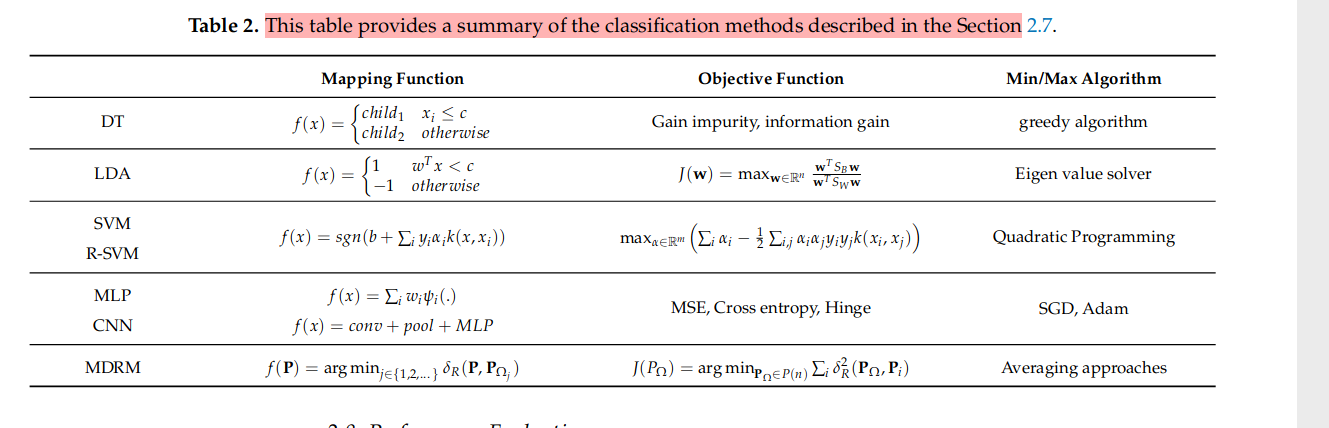